In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

# Plot trajectory

In [14]:
date = "0921-0839"
path_num = 0
data = np.load(f"res/{date}/traj/{path_num}.npy")

# date = "0922-1357"
# path_num = "long"
# temperature = "900.0"
# data = np.load(f"res/{date}/{temperature}/{path_num}.npy")[0]

print(data.shape)

(10001, 2)


In [16]:
data[23].shape

(2,)

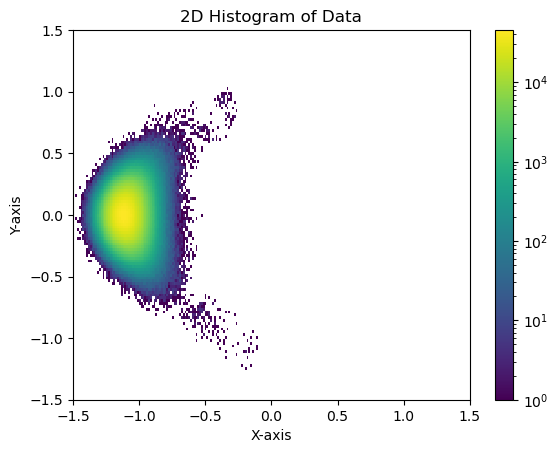

In [13]:
plt.hist2d(data[:, 0], data[:, 1], bins=100, norm=LogNorm())
plt.colorbar()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.title('2D Histogram of Data')
plt.show()

# Potential landscape

In [2]:
class Synthetic:
	def force_energy(self, position):
		position = self.potential(position)
		position.requires_grad_(False)
		force = -torch.autograd.grad(potential.sum(), position)[0]
		return force, potential.detach()

	def potential(self, position):
		position.requires_grad_(True)
		x = position[:, 0]
		y = position[:, 1]
		term_1 = 4 * (1 - x**2 - y**2) ** 2
		term_2 = 2 * (x**2 - 2) ** 2
		term_3 = ((x + y) ** 2 - 1) ** 2
		term_4 = ((x - y) ** 2 - 1) ** 2
		potential = (term_1 + term_2 + term_3 + term_4 - 2.0) / 6.0

		return potential.detach()

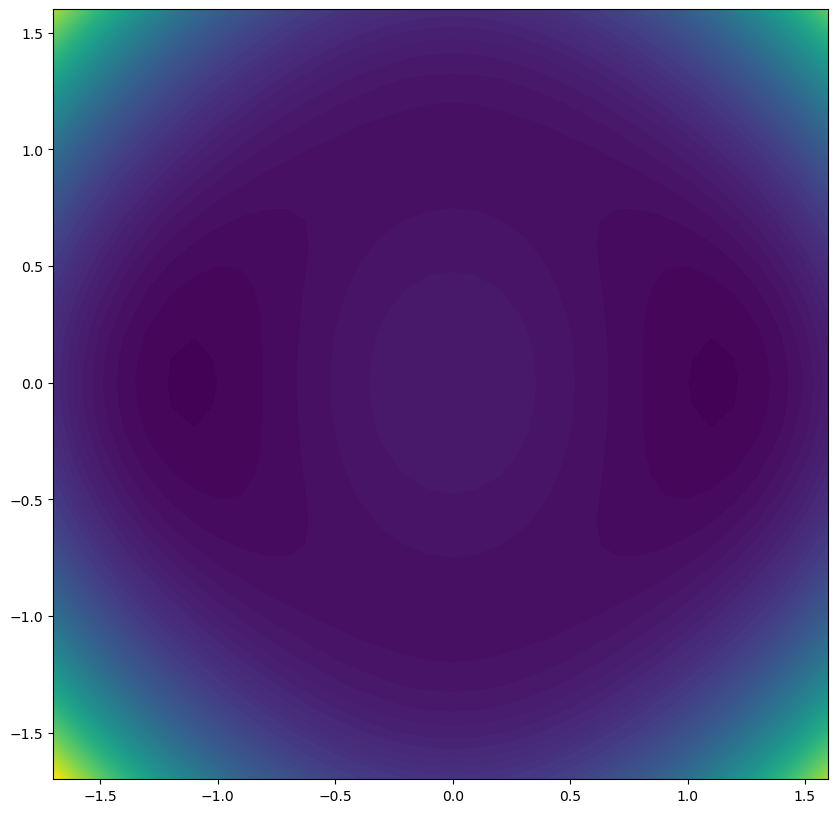

In [6]:
synthetic = Synthetic()
fig = plt.figure(figsize=(10, 10))

# Convert the numpy array data to a torch tensor
bound = 1.6
xs = np.arange(-bound-0.1, bound+0.1, 0.01)
ys = np.arange(-bound-0.1, bound+0.1, 0.01)
x, y = np.meshgrid(xs, ys)
inp = torch.tensor(np.array([x, y])).view(2, -1).T
z = synthetic.potential(inp)
z = z.view(y.shape[0], y.shape[1])

plt.contourf(xs, ys, z, levels=100, zorder=0)
plt.show()

In [10]:
# Save x, y, z values in one line for all the values z has in "potential.dat" file
with open("potential.dat", "w") as f:
	for i in range(z.shape[0]):
		for j in range(z.shape[1]):
			f.write(f"{x[i, j]} {y[i, j]} {z[i, j].item()}\n")